# Лабораторная работа №3, Вариант 10

## Бинарная классификация

### Цель работы: познакомиться с применением модели машинного обучения для решения задач классификации (метод логистической регрессии)

Выполним анализ набора данных «Прогнозирование карьеры игроков НБА». Набор представляет собой статистику новичков НБА для прогнозирования того, продержится ли игрок пять лет в лиге. Анализ полезен в работе над стратегиями команд и игроками. Набор данных подходит для обучения моделей логистической регрессии, моделей классификации.

## Атрибуты набора данных

Набор данных включает следующие атрибуты:

- **Name** – имя игрока
- **GP (Games Played)** – общее количество игр, в которых игрок принимал участие
- **MIN (Minutes)** – общее количество минут, проведенных игроком на площадке
- **PTS (Points)** – общее количество очков, набранных игроком в течение карьеры или в определенном сезоне
- **FGM (Field Goals Made)** – количество успешно заброшенных мячей
- **FGA (Field Goals Attempted)** – количество всех выполненных бросков
- **FG% (Field Goal Percentage)** – процент реализованных бросков в атаке
- **3P Made** – количество успешных трехочковых бросков
- **3PA (Three-Point Attempts)** – количество попыток трехочковых бросков, показывающее, как часто игрок пытается забросить с дальней дистанции
- **3P% (Three-Point Percentage)** – процент реализации трехочковых бросков
- **FTM (Free Throws Made)** – количество успешно заброшенных штрафных бросков
- **FTA (Free Throws Attempted)** – количество попыток штрафных бросков
- **FT% (Free Throw Percentage)** – процентное соотношение между результативными штрафными бросками и общим количеством штрафных бросков
- **OREB (Offensive Rebounds)** – количество выигранных подборов под корзиной соперника
- **DREB (Defensive Rebounds)** – количество выигранных подборов под своей корзиной
- **REB (Total Rebounds)** – общее количество подборов (как атакующих, так и оборонительных)
- **AST (Assists)** – количество передач, после которых был выполнен результативный бросок
- **STL (Steals)** – количество удачных перехватов мяча
- **BLK (Blocks)** – количество удачно выполненных блоков
- **TOV (Turnovers)** – количество потерянных мячей
- **Target_5Yrs** – целевая переменная (0 или 1)

## 1. Импортируйте необходимые библиотеки

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv("nba.csv")
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


Выведем целевую переменную, целевые имена и частоту кждого уникального значения:

In [7]:
(unique,counts) = np.unique(df['TARGET_5Yrs'], return_counts=True)
print('Unique values of the target variable:', unique)
print('Counts of the target variable:', counts)

Unique values of the target variable: [0 1]
Counts of the target variable: [509 831]


Построим столбчатую диаграмму, чтобы увидеть целевую переменную:

<Axes: xlabel='TARGET_5Yrs', ylabel='count'>

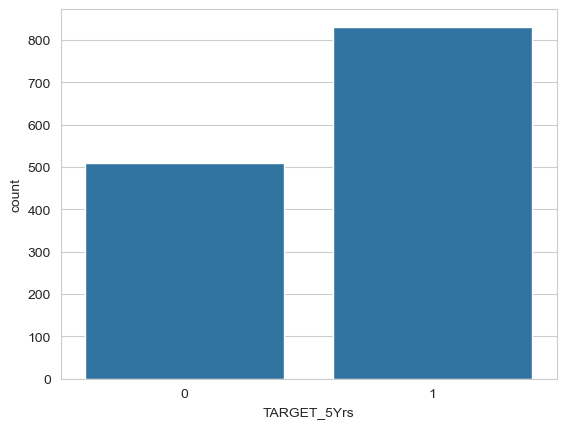

In [9]:
sns.set_style("whitegrid")
sns.countplot(df,x = 'TARGET_5Yrs')

Анализ диаграммы показывает, что набор данных является несбалансированным

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

## Проверяем наличие пропущенных значений и выбросов

In [13]:
print(df.isnull().sum())

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


Для всех игроков, которые не пытались забросить 3-х очковые заполним колонки нулями

In [61]:
df['3P%'] = df['3P%'].fillna(0)

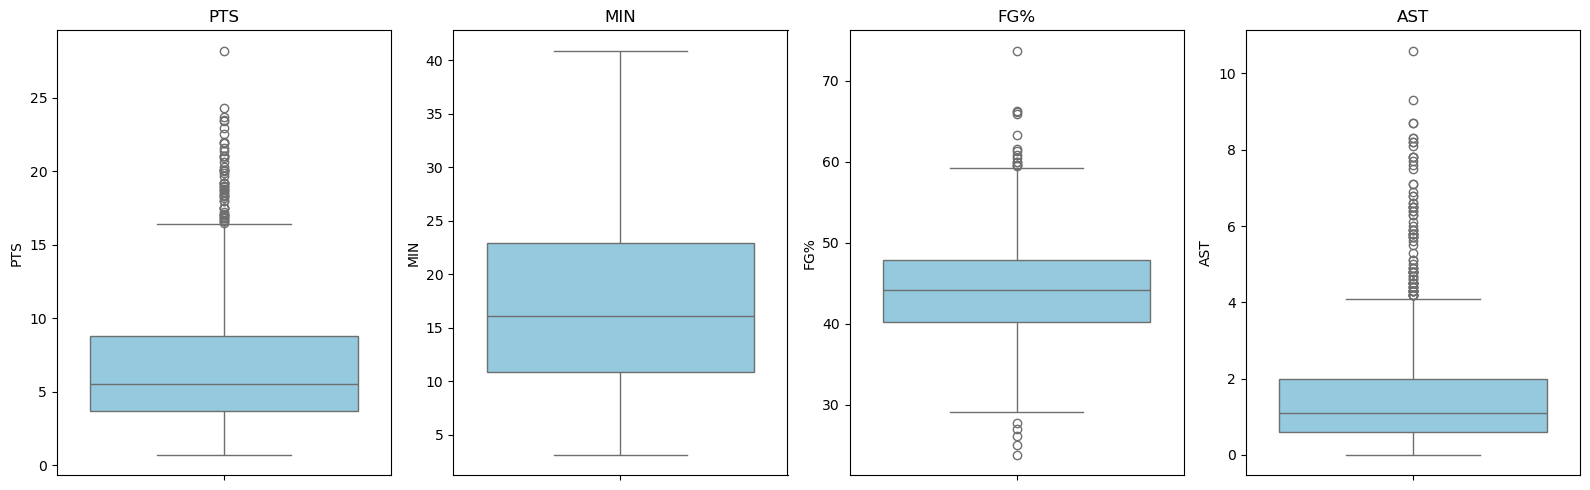

In [62]:
# Проверим датасет на выбросы:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
numeric_cols = ['PTS', 'MIN', 'FG%', 'AST']
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

## Исключаем невлияющие категориальные признаки

Проверим категориальные признаки на уникальность

In [74]:
df_copy = df.copy()
non_influencing_categorical_features = ['Name']
df_copy.drop(non_influencing_categorical_features, axis=1, inplace=True)
df_copy['3P%'] = df_copy['3P%'].fillna(0) #Для всех игроков, которые не пытались забросить 3-х очковые заполним колонки нулями в копии датафрейма
df_copy.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


## Разделяем данные на признаки и целевую переменную

In [67]:
y = df['TARGET_5Yrs']
X = df_copy.drop('TARGET_5Yrs', axis = 1)
X


,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8


## Применяем операцию нормализации для численной устойчивости

In [68]:
standardizer = StandardScaler()
X_scaled = standardizer.fit_transform(X)
print(np.isnan(X_scaled).sum())

0


## Разделяем данные на тренировочный и тестовый наборы.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

## Обучаем модель логистической регрессии

In [73]:
#Доп. Проверка на нулевые значения
print("X_train NaN:", np.isnan(X_train).sum())
print("y_train NaN:", np.isnan(y_train).sum())

y_train NaN: 0


In [93]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

## Делаем прогноз на основе данных тестирования

In [78]:
y_pred = model.predict(X_test)

## Рассчитываем показатели точности, сравнив фактичнеские и прогнозируемые значения

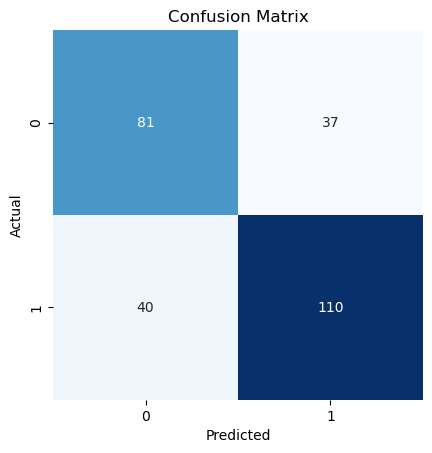

In [88]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [91]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")

Точность: 0.71


In [90]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Точность: {precision:.2f}")
print(f"Полнота: {recall:.2f}")
     

Точность: 0.75
Полнота: 0.73


In [89]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-мера: {f1:.2f}")
     

F1-мера: 0.74


In [85]:
df_copy.corr()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
GP,1.000000,0.590240,0.538471,0.542724,0.516625,0.296289,0.107423,0.098772,0.037133,0.482123,0.479487,0.196299,0.401136,0.466840,0.460406,0.372749,0.451137,0.276498,0.518167,0.396833
MIN,0.590240,1.000000,0.911822,0.903060,0.910247,0.203901,0.389920,0.403258,0.168070,0.791000,0.779609,0.239878,0.573062,0.745513,0.709707,0.629015,0.757034,0.399088,0.826500,0.317805
PTS,0.538471,0.911822,1.000000,0.990834,0.979733,0.255333,0.346682,0.356751,0.154955,0.896297,0.880703,0.258931,0.575106,0.693934,0.676849,0.552338,0.675341,0.387043,0.850366,0.315981
FGM,0.542724,0.903060,0.990834,1.000000,0.980050,0.291693,0.289007,0.299057,0.122542,0.848019,0.840408,0.223566,0.596687,0.703278,0.691186,0.532534,0.662640,0.398125,0.834352,0.317594
FGA,0.516625,0.910247,0.979733,0.980050,1.000000,0.129798,0.390253,0.413560,0.201186,0.826616,0.805559,0.269614,0.504212,0.640123,0.614328,0.589818,0.690168,0.322184,0.845989,0.292660
FG%,0.296289,0.203901,0.255333,0.291693,0.129798,1.000000,-0.294471,-0.350658,-0.336502,0.245776,0.300154,-0.161183,0.511367,0.410555,0.465423,-0.108797,0.056658,0.391626,0.121806,0.227134
3P Made,0.107423,0.389920,0.346682,0.289007,0.390253,-0.294471,1.000000,0.982616,0.591733,0.158472,0.095396,0.314355,-0.219010,0.016570,-0.072503,0.376604,0.306908,-0.158535,0.258369,0.036619
3PA,0.098772,0.403258,0.356751,0.299057,0.413560,-0.350658,0.982616,1.000000,0.584853,0.173533,0.108388,0.323612,-0.231897,0.011226,-0.080939,0.410531,0.338631,-0.172150,0.283925,0.018110
3P%,0.037133,0.168070,0.154955,0.122542,0.201186,-0.336502,0.591733,0.584853,1.000000,0.036245,-0.027249,0.332458,-0.289399,-0.125716,-0.193082,0.266898,0.198237,-0.246358,0.111495,-0.000004
FTM,0.482123,0.791000,0.896297,0.848019,0.826616,0.245776,0.158472,0.173533,0.036245,1.000000,0.980505,0.257818,0.583865,0.653823,0.653833,0.476214,0.600158,0.407466,0.804990,0.296841


## Строим ROC-кривую

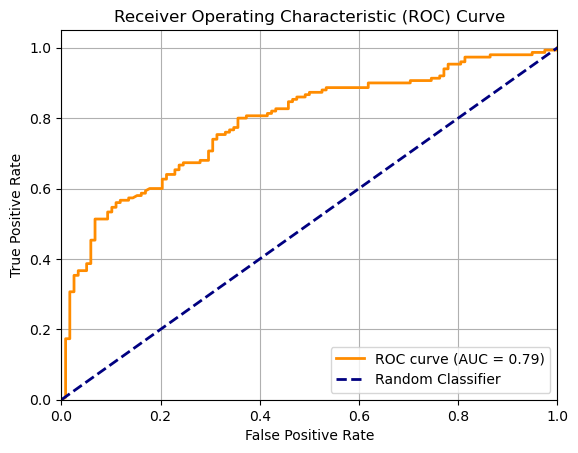

In [92]:
from sklearn.metrics import roc_curve, auc

y_score = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()